In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import HuberRegressor

In [2]:
df = pd.read_csv('./marketing-outliers.csv')

In [3]:
x = df.tv.values
y = df.sales.values

x_values = np.linspace(x.min(),x.max(),100)


In [4]:
# lr with polyfit degree 2
coefs = np.polyfit(x,y,deg=2)
y_poly2_values = np.polyval(coefs,x_values)

In [5]:
# lr with polyfit degree 2
coefs = np.polyfit(x,y,deg=3)
y_poly3_values = np.polyval(coefs,x_values)

In [6]:
# Huber Loss degree 2
lr_huber = HuberRegressor(epsilon=1.35)
lr_huber.fit(x[:,np.newaxis],y)
y_huber2_values = lr_huber.predict(x_values[:,np.newaxis])

In [7]:
x_deg3 = np.c_[x,x**2,x**3]
lr_huber.fit(x_deg3,y)
y_huber3_values = lr_huber.predict(np.c_[x_values,x_values**2,x_values**3])


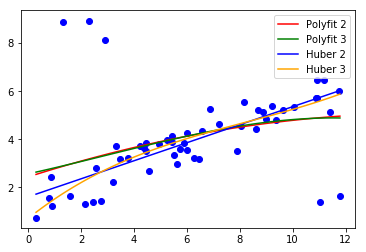

In [8]:


plt.scatter(x,y,c='b')
plt.plot(x_values,y_poly2_values,c='r',label='Polyfit 2')
plt.plot(x_values,y_poly3_values,c='green',label='Polyfit 3')
plt.plot(x_values,y_huber2_values,c='blue',label='Huber 2')
plt.plot(x_values,y_huber3_values,c='orange',label='Huber 3')

plt.legend()

plt.show()